In [69]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from datetime import datetime


In [70]:
data_path = r"C:\Users\mandh\Downloads\drive-download-20250427T144849Z-001"  # <<< change this to your folder path

json_files = glob(os.path.join(data_path, '*.json'))

print(f"Found {len(json_files)} JSON files.")


Found 96 JSON files.


In [76]:
all_records = []

for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        
        if 'deposits' in data:
            for item in data['deposits']:
                record = {
                    'account_id': item['account']['id'],
                    'amount': float(item['amount']),
                    'amountUSD': float(item['amountUSD']),
                    'asset_id': item['asset']['id'],
                    'asset_symbol': item['asset']['symbol'],
                    'hash': item['hash'],
                    'timestamp': item['timestamp']
                }
                all_records.append(record)

df = pd.DataFrame(all_records)

print(f"Total transactions loaded: {len(df)}")


Total transactions loaded: 959305


In [77]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

df['account_id'] = df['account_id'].str.lower()

df = df.drop_duplicates()

print(df.isnull().sum())

df.head()


C:\Users\mandh\AppData\Local\Temp\ipykernel_6728\2367480489.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


account_id      0
amount          0
amountUSD       0
asset_id        0
asset_symbol    0
hash            0
timestamp       0
dtype: int64


,account_id,amount,amountUSD,asset_id,asset_symbol,hash,timestamp
0,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.000000e+16,1.78010,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,0xa1b27194b198762eaa631564fea76008b363c157a1cc...,2019-05-07 01:41:22
1,0xc8355d0e2c265b2fe495ebbc0fc9ad992b40dc8f,8.000000e+16,14.24080,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,0x1d2000c49507d94ef42ec995e1ea59b41e61bf0c63d4...,2019-05-07 01:45:11
2,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,4.582921e+21,1562.32014,0x0d8775f648430679a709e98d2b0cb6250d2887ef,BAT,0x4c3b59d70f6205a16f4d6f4c960d22ad332dd740720a...,2019-05-07 02:12:05
3,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,4.013963e+21,4013.96294,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,0xe8b31ff5cf7252a1a496dadfeccef667577d88cdf2c4...,2019-05-07 02:12:05
4,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,9.990000e+18,1775.47275,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,0x0eda39d1cb1844e8c2f659219f5a414c0b8261e6dee5...,2019-05-07 02:41:52


In [79]:
df.to_csv('cleaned_transactions.csv', index=False)
print("Data cleaned and saved!")

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


df['account_id'] = df['account_id'].str.lower()

df = df.drop_duplicates()

print(df.isnull().sum())

df.head()


Data cleaned and saved!
account_id      0
amount          0
amountUSD       0
asset_id        0
asset_symbol    0
hash            0
timestamp       0
dtype: int64


,account_id,amount,amountUSD,asset_id,asset_symbol,hash,timestamp
0,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.000000e+16,1.78010,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,0xa1b27194b198762eaa631564fea76008b363c157a1cc...,2019-05-07 01:41:22
1,0xc8355d0e2c265b2fe495ebbc0fc9ad992b40dc8f,8.000000e+16,14.24080,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,0x1d2000c49507d94ef42ec995e1ea59b41e61bf0c63d4...,2019-05-07 01:45:11
2,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,4.582921e+21,1562.32014,0x0d8775f648430679a709e98d2b0cb6250d2887ef,BAT,0x4c3b59d70f6205a16f4d6f4c960d22ad332dd740720a...,2019-05-07 02:12:05
3,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,4.013963e+21,4013.96294,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,0xe8b31ff5cf7252a1a496dadfeccef667577d88cdf2c4...,2019-05-07 02:12:05
4,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,9.990000e+18,1775.47275,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,0x0eda39d1cb1844e8c2f659219f5a414c0b8261e6dee5...,2019-05-07 02:41:52


In [82]:
deposit_records = []
borrow_records = []

for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)

        # Extract Deposits
        if 'deposits' in data:
            for item in data['deposits']:
                record = {
                    'type': 'deposit',
                    'account_id': item['account']['id'],
                    'amount': float(item['amount']),
                    'amountUSD': float(item['amountUSD']),
                    'asset_id': item['asset']['id'],
                    'asset_symbol': item['asset']['symbol'],
                    'hash': item['hash'],
                    'timestamp': item['timestamp']
                }
                deposit_records.append(record)

        if 'borrows' in data:
            for item in data['borrows']:
                record = {
                    'type': 'borrow',
                    'account_id': item['account']['id'],
                    'amount': float(item['amount']),
                    'amountUSD': float(item['amountUSD']),
                    'asset_id': item['asset']['id'],
                    'asset_symbol': item['asset']['symbol'],
                    'hash': item['hash'],
                    'timestamp': item['timestamp']
                }
                borrow_records.append(record)

df_deposit = pd.DataFrame(deposit_records)
df_borrow = pd.DataFrame(borrow_records)

df = pd.concat([df_deposit, df_borrow], ignore_index=True)

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['account_id'] = df['account_id'].str.lower()
df = df.drop_duplicates()

print(f"Total transactions after merging: {len(df)}")
df.head()

C:\Users\mandh\AppData\Local\Temp\ipykernel_6728\3620335270.py:48: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


Total transactions after merging: 1184558


,type,account_id,amount,amountUSD,asset_id,asset_symbol,hash,timestamp
0,deposit,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.000000e+16,1.78010,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,0xa1b27194b198762eaa631564fea76008b363c157a1cc...,2019-05-07 01:41:22
1,deposit,0xc8355d0e2c265b2fe495ebbc0fc9ad992b40dc8f,8.000000e+16,14.24080,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,0x1d2000c49507d94ef42ec995e1ea59b41e61bf0c63d4...,2019-05-07 01:45:11
2,deposit,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,4.582921e+21,1562.32014,0x0d8775f648430679a709e98d2b0cb6250d2887ef,BAT,0x4c3b59d70f6205a16f4d6f4c960d22ad332dd740720a...,2019-05-07 02:12:05
3,deposit,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,4.013963e+21,4013.96294,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,0xe8b31ff5cf7252a1a496dadfeccef667577d88cdf2c4...,2019-05-07 02:12:05
4,deposit,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,9.990000e+18,1775.47275,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,0x0eda39d1cb1844e8c2f659219f5a414c0b8261e6dee5...,2019-05-07 02:41:52


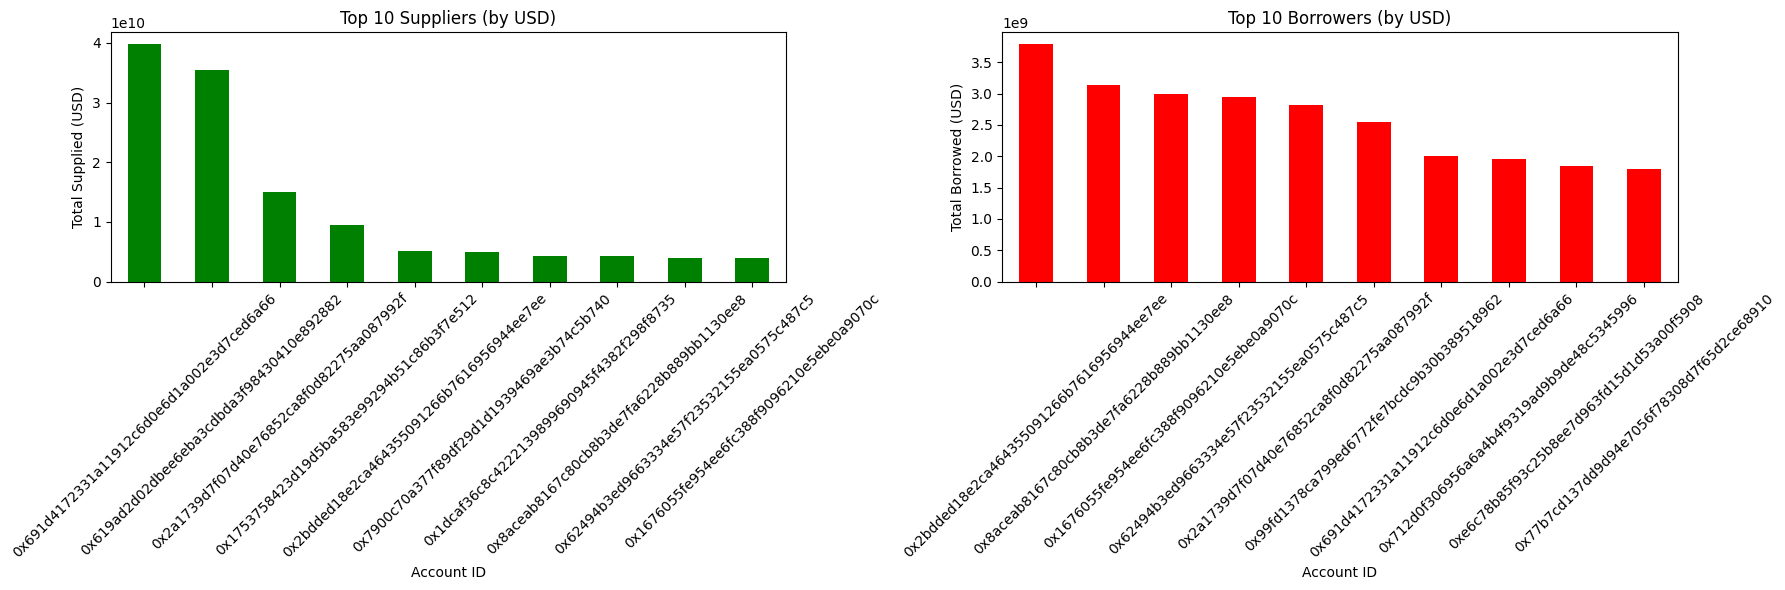

In [83]:
suppliers = df[df['type'] == 'deposit']
borrowers = df[df['type'] == 'borrow']

top_suppliers = suppliers.groupby('account_id')['amountUSD'].sum().sort_values(ascending=False).head(10)

top_borrowers = borrowers.groupby('account_id')['amountUSD'].sum().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(18,6))

top_suppliers.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Top 10 Suppliers (by USD)')
axes[0].set_ylabel('Total Supplied (USD)')
axes[0].set_xlabel('Account ID')
axes[0].tick_params(axis='x', rotation=45)

top_borrowers.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Top 10 Borrowers (by USD)')
axes[1].set_ylabel('Total Borrowed (USD)')
axes[1].set_xlabel('Account ID')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [84]:
user_activity = df.groupby(['account_id', 'type']).size().unstack(fill_value=0)

print(user_activity.head())

def classify_user(row):
    if row.get('deposit', 0) > 0 and row.get('borrow', 0) == 0:
        return 'Passive Supplier'
    elif row.get('deposit', 0) > 0 and row.get('borrow', 0) > 0:
        return 'Active Trader'
    elif row.get('deposit', 0) == 0 and row.get('borrow', 0) > 0:
        return 'Only Borrower'
    else:
        return 'Inactive/Other'

user_activity['user_type'] = user_activity.apply(classify_user, axis=1)

user_type_counts = user_activity['user_type'].value_counts()
print(user_type_counts)


type                                        borrow  deposit
account_id                                                 
0x0000000000002cb29260612e744ec57d9d1fc5c6       0        1
0x0000000000007f150bd6f54c40a34d7c3d5e9f56       0      739
0x00000000000080c886232e9b7ebbfb942b5987aa       0        6
0x000000000000deab340f067535869a0e5226e58a       0        2
0x00000000000123685885532dcb685c442dc83126       0      175
user_type
Passive Supplier    358987
Active Trader        29669
Only Borrower          334
Name: count, dtype: int64


C:\Users\mandh\AppData\Local\Temp\ipykernel_6728\3533558080.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='viridis')


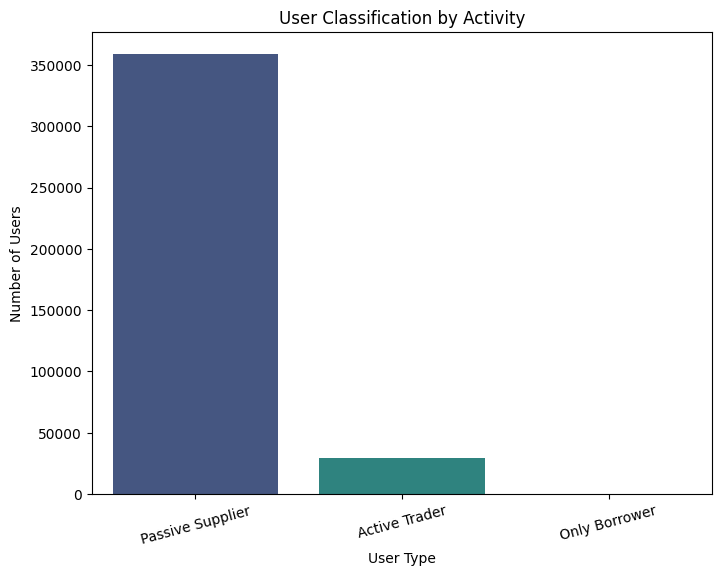

In [85]:
plt.figure(figsize=(8,6))
sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='viridis')
plt.title('User Classification by Activity')
plt.ylabel('Number of Users')
plt.xlabel('User Type')
plt.xticks(rotation=15)
plt.show()


In [86]:
liquidation_records = []

for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)

     
        if 'liquidations' in data:
            for item in data['liquidations']:
                record = {
                    'type': 'liquidation',
                    'account_id': item['account']['id'],  # The user who was liquidated
                    'liquidator_id': item['liquidator']['id'],  # The user who liquidated
                    'amountUSD': float(item['amountUSD']),
                    'asset_id': item['asset']['id'],
                    'asset_symbol': item['asset']['symbol'],
                    'hash': item['hash'],
                    'timestamp': item['timestamp']
                }
                liquidation_records.append(record)

df_liquidation = pd.DataFrame(liquidation_records)

if not df_liquidation.empty:
    df_liquidation['timestamp'] = pd.to_datetime(df_liquidation['timestamp'], unit='s')
    df_liquidation['account_id'] = df_liquidation['account_id'].str.lower()
    df_liquidation['liquidator_id'] = df_liquidation['liquidator_id'].str.lower()

print(f"Total liquidations found: {len(df_liquidation)}")
df_liquidation.head()


Total liquidations found: 0


""


C:\Users\mandh\AppData\Local\Temp\ipykernel_6728\835945392.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=token_usage_counts.index, y=token_usage_counts.values, palette='muted')


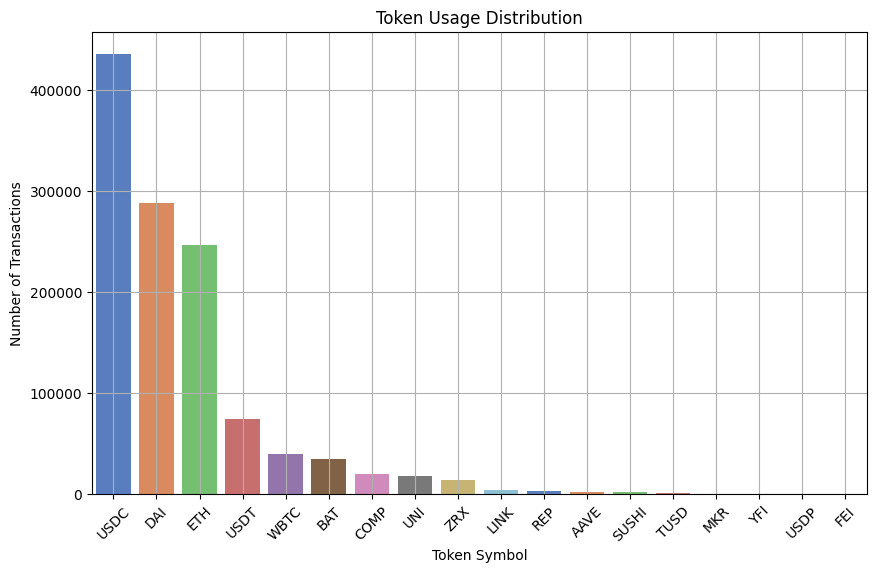

In [88]:
token_usage_counts = df['asset_symbol'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=token_usage_counts.index, y=token_usage_counts.values, palette='muted')
plt.title('Token Usage Distribution')
plt.xlabel('Token Symbol')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\mandh\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


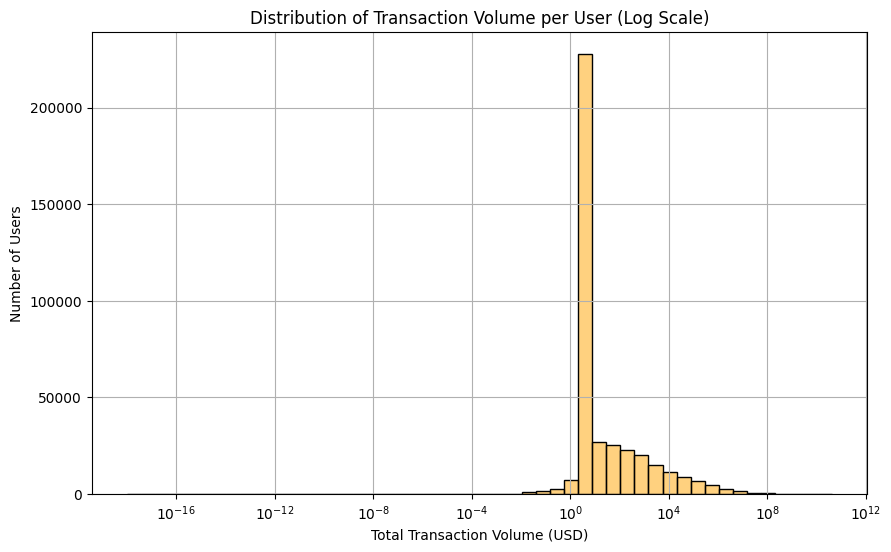

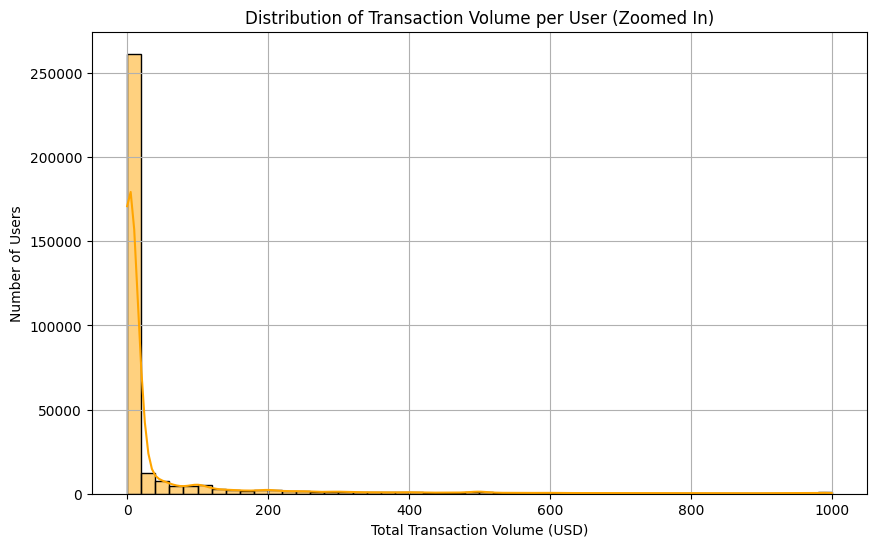

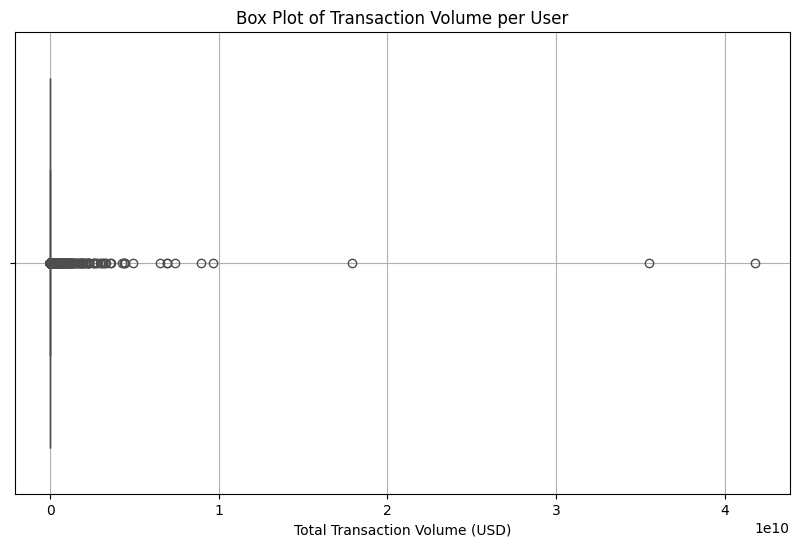

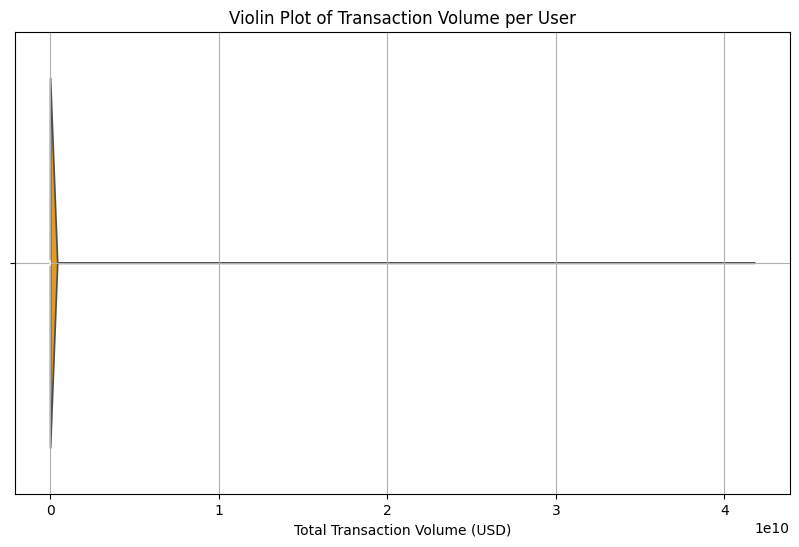

In [92]:
user_volume = df.groupby('account_id')['amountUSD'].sum()

plt.figure(figsize=(10, 6))
sns.histplot(user_volume, bins=50, kde=True, color='orange', log_scale=True)
plt.title('Distribution of Transaction Volume per User (Log Scale)')
plt.xlabel('Total Transaction Volume (USD)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(user_volume[user_volume < 1000], bins=50, kde=True, color='orange')
plt.title('Distribution of Transaction Volume per User (Zoomed In)')
plt.xlabel('Total Transaction Volume (USD)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=user_volume, color='orange')
plt.title('Box Plot of Transaction Volume per User')
plt.xlabel('Total Transaction Volume (USD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x=user_volume, color='orange')
plt.title('Violin Plot of Transaction Volume per User')
plt.xlabel('Total Transaction Volume (USD)')
plt.grid(True)
plt.show()

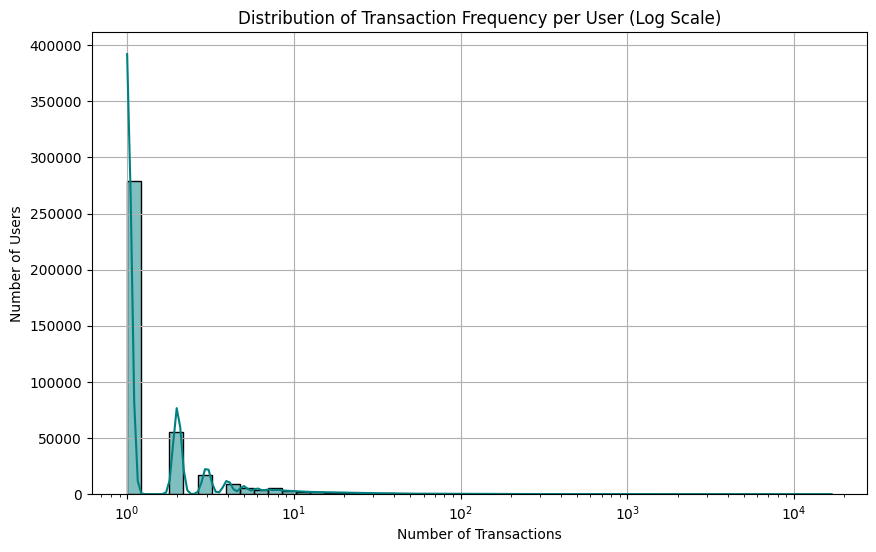

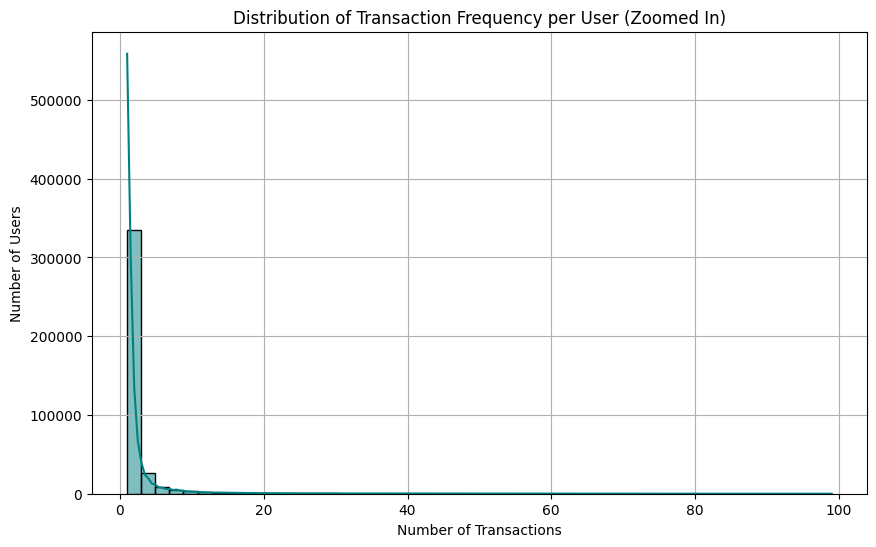

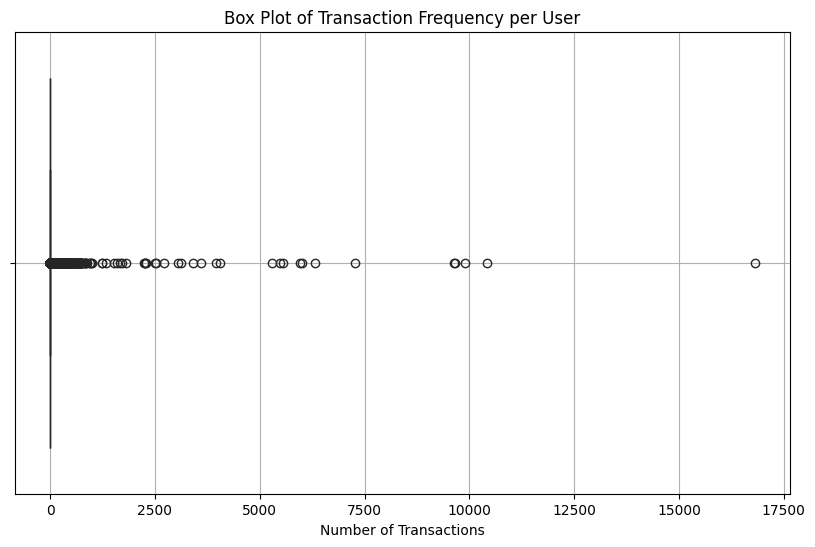

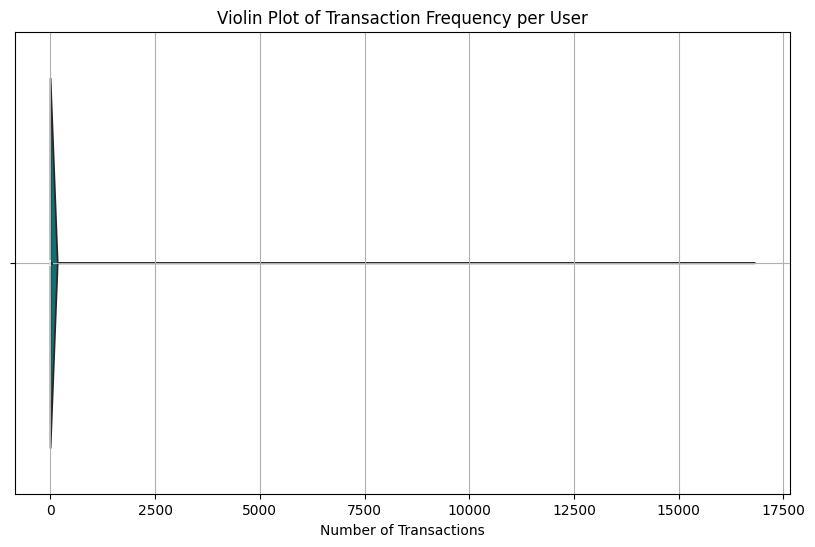

In [93]:
user_transaction_counts = df['account_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(user_transaction_counts, bins=50, kde=True, color='teal', log_scale=True)
plt.title('Distribution of Transaction Frequency per User (Log Scale)')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(user_transaction_counts[user_transaction_counts < 100], bins=50, kde=True, color='teal')
plt.title('Distribution of Transaction Frequency per User (Zoomed In)')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=user_transaction_counts, color='teal')
plt.title('Box Plot of Transaction Frequency per User')
plt.xlabel('Number of Transactions')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x=user_transaction_counts, color='teal')
plt.title('Violin Plot of Transaction Frequency per User')
plt.xlabel('Number of Transactions')
plt.grid(True)
plt.show()

C:\Users\mandh\AppData\Local\Temp\ipykernel_6728\3443224707.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_volume.index, y=market_volume.values, palette='magma')


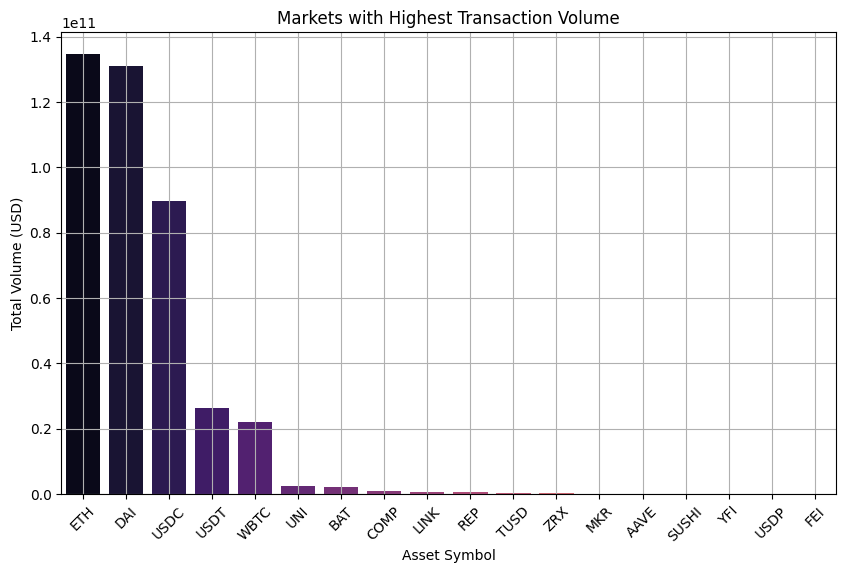

In [94]:
# Group by asset symbol and sum up the amountUSD
market_volume = df.groupby('asset_symbol')['amountUSD'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=market_volume.index, y=market_volume.values, palette='magma')
plt.title('Markets with Highest Transaction Volume')
plt.xlabel('Asset Symbol')
plt.ylabel('Total Volume (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\mandh\AppData\Local\Temp\ipykernel_6728\3752772279.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_user_count.index, y=market_user_count.values, palette='coolwarm')


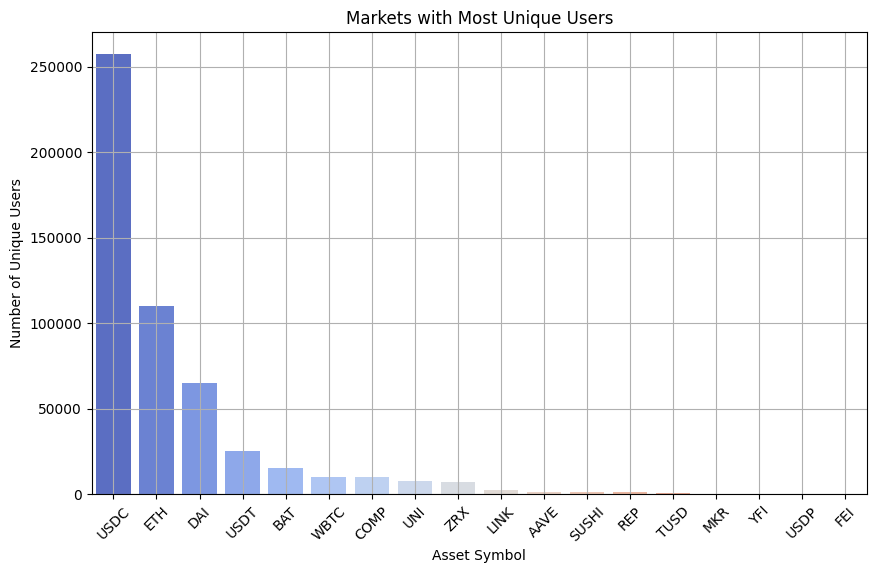

C:\Users\mandh\AppData\Local\Temp\ipykernel_6728\3752772279.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_user_count.index, y=market_user_count.values, palette='coolwarm')


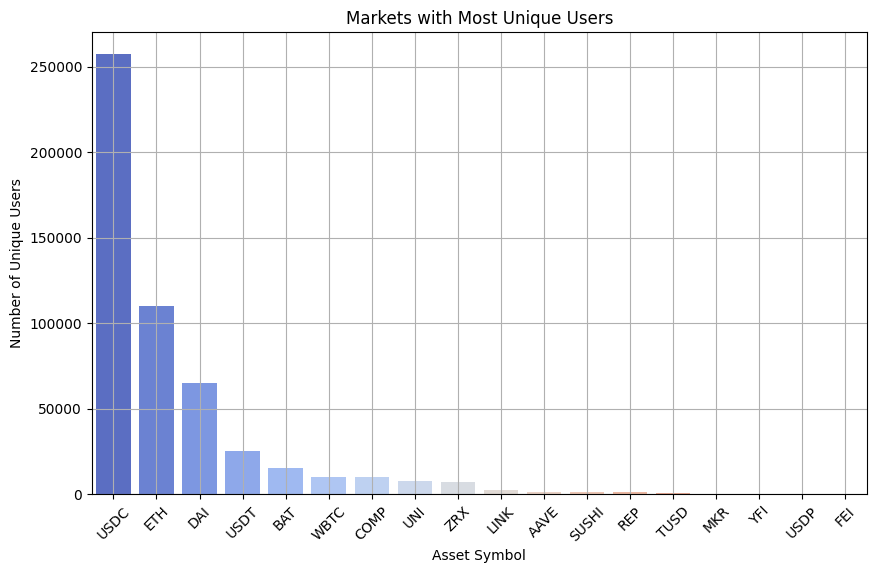

In [97]:
## Grouped by asset and count unique user
market_user_count = df.groupby('asset_symbol')['account_id'].nunique().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=market_user_count.index, y=market_user_count.values, palette='coolwarm')
plt.title('Markets with Most Unique Users')
plt.xlabel('Asset Symbol')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

market_user_count = df.groupby('asset_symbol')['account_id'].nunique().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=market_user_count.index, y=market_user_count.values, palette='coolwarm')
plt.title('Markets with Most Unique Users')
plt.xlabel('Asset Symbol')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


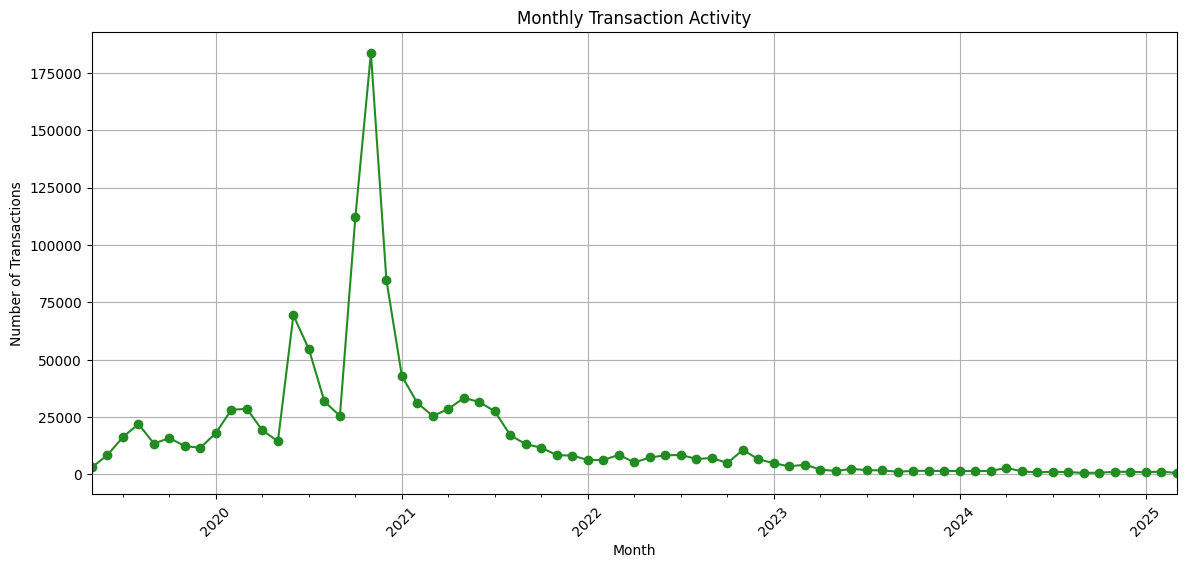

In [98]:
df['month'] = df['timestamp'].dt.to_period('M')

# Grouped by month and count number of transactions
monthly_transactions = df.groupby('month').size()

# Plot
plt.figure(figsize=(14,6))
monthly_transactions.plot(kind='line', marker='o', color='forestgreen')
plt.title('Monthly Transaction Activity')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


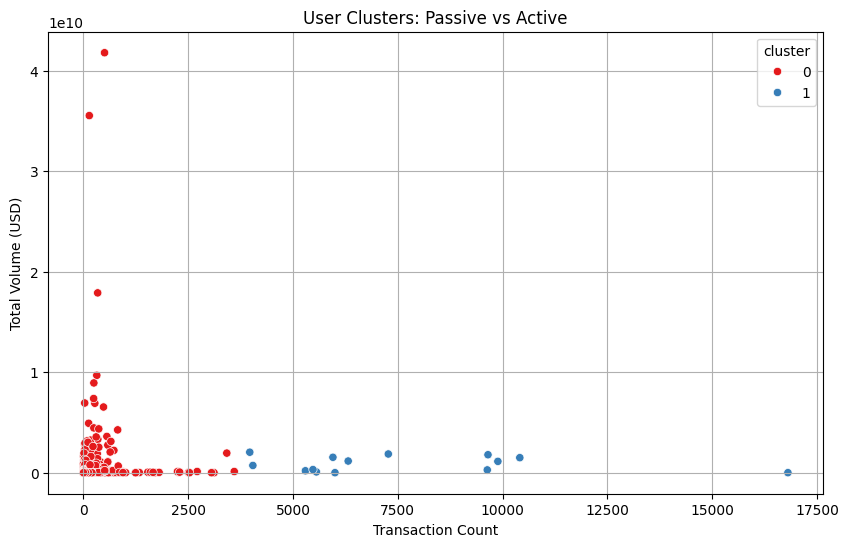

In [101]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

user_features = df.groupby('account_id').agg({
    'amountUSD': 'sum',
    'account_id': 'count'
}).rename(columns={'account_id': 'transaction_count'})

scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_features)

kmeans = KMeans(n_clusters=2, random_state=42)
user_features['cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=user_features, 
    x='transaction_count', 
    y='amountUSD', 
    hue='cluster', 
    palette='Set1'
)
plt.title('User Clusters: Passive vs Active')
plt.xlabel('Transaction Count')
plt.ylabel('Total Volume (USD)')
plt.grid(True)
plt.show()


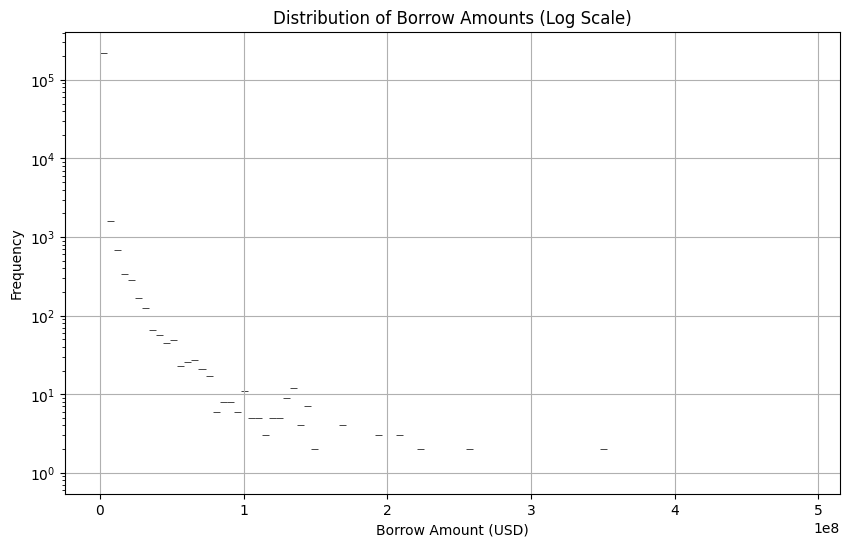

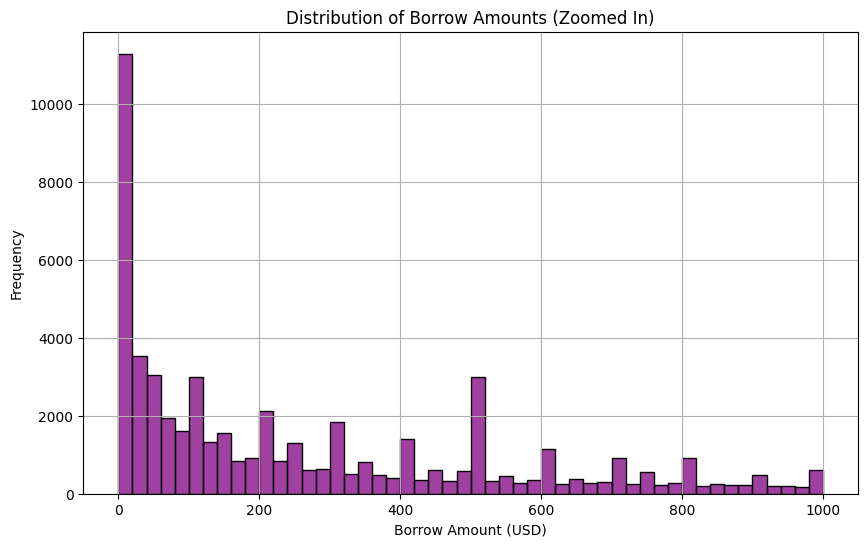

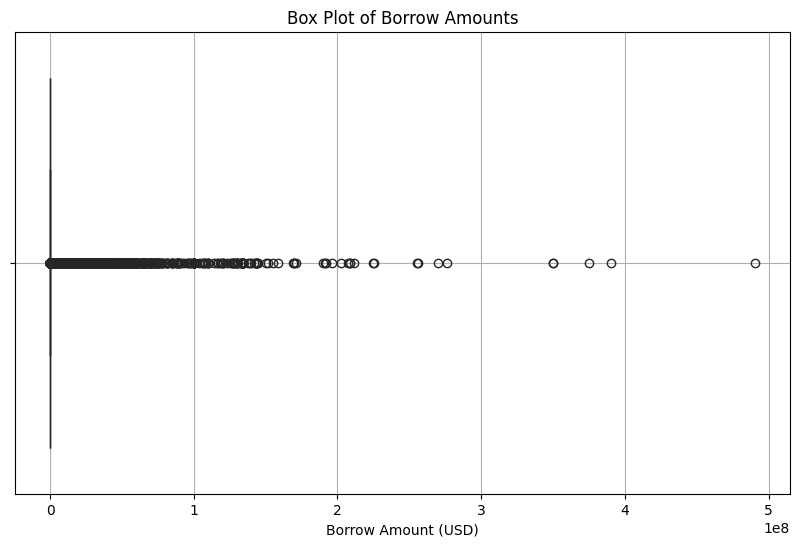

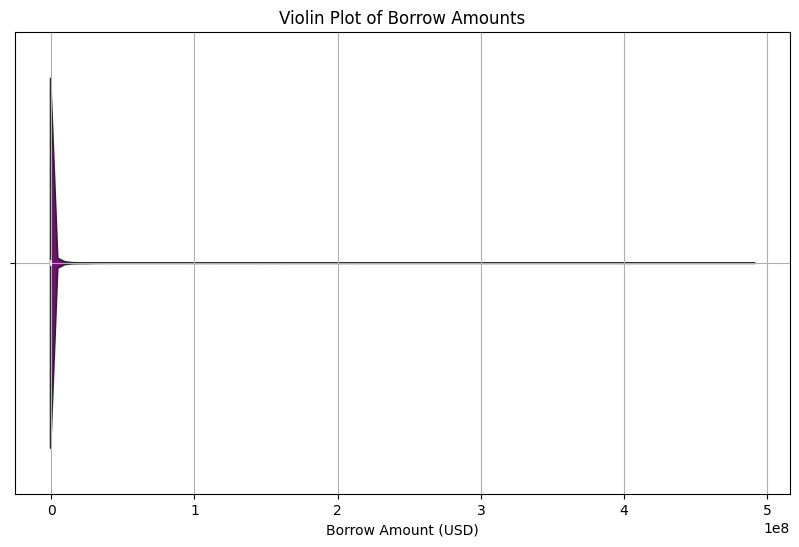

In [104]:
borrow_amounts = df[df['type'] == 'borrow']['amountUSD']

plt.figure(figsize=(10, 6))
sns.histplot(borrow_amounts, bins=100, color='purple', log_scale=(False, True))
plt.title('Distribution of Borrow Amounts (Log Scale)')
plt.xlabel('Borrow Amount (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(borrow_amounts[borrow_amounts < 1000], bins=50, color='purple')
plt.title('Distribution of Borrow Amounts (Zoomed In)')
plt.xlabel('Borrow Amount (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=borrow_amounts, color='purple')
plt.title('Box Plot of Borrow Amounts')
plt.xlabel('Borrow Amount (USD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x=borrow_amounts, color='purple')
plt.title('Violin Plot of Borrow Amounts')
plt.xlabel('Borrow Amount (USD)')
plt.grid(True)
plt.show()

In [109]:
#Since no liquidation events were recorded, pre-liquidation wallet behavior (such as rapid borrowing or withdrawal before liquidation) could not be analyzed.

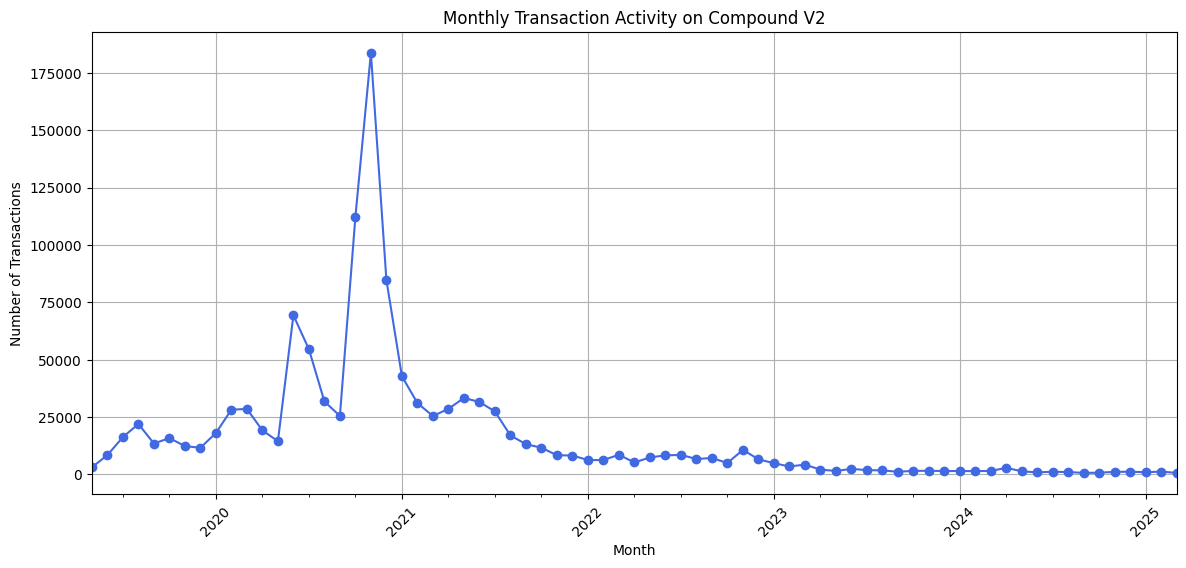

In [105]:
plt.figure(figsize=(14,6))
monthly_transactions.plot(kind='line', marker='o', color='royalblue')
plt.title('Monthly Transaction Activity on Compound V2')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
